In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df= pd.read_csv(r"C:\Users\aswin\Downloads\bengaluru_house_prices.csv")

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

In [5]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [7]:
df['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [8]:
df=df.drop(columns=['area_type','availability', 'society','balcony'],axis=1)
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [9]:
df.location.value_counts()

location
Whitefield                 540
Sarjapur  Road             399
Electronic City            302
Kanakpura Road             273
Thanisandra                234
                          ... 
Park View Layout             1
Xavier Layout                1
Air View Colony              1
akshaya nagar t c palya      1
mvj engineering college      1
Name: count, Length: 1305, dtype: int64

In [10]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [11]:
df.dropna(inplace=True)


In [12]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [13]:
df.shape

(13246, 5)

In [14]:
df.head(2)


,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00


In [15]:
df['bhk']=df['size'].apply(lambda x: int(x.split(" ")[0]))
df.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
5,Whitefield,2 BHK,1170,2.0,38.00,2
6,Old Airport Road,4 BHK,2732,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300,4.0,600.00,4
8,Marathahalli,3 BHK,1310,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00,6


In [16]:
df['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [17]:
def is_float(x):
    try:
        float(x)
    except:
        return False 
    return True

In [18]:
df[~df['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [19]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2067,), dtype=object)

In [20]:
def convert_sqft_to_num(x):
    ak= x.split('-')
    if len(ak)==2:
        return (float(ak[0])+float(ak[1]))/2
    try:
        return float(x)
    except:
        return None
    
        
    

In [21]:
df['total_sqft']=df['total_sqft'].apply(convert_sqft_to_num)


In [22]:
df.sample(10)

,location,size,total_sqft,bath,price,bhk
2350,Begur Road,2 BHK,970.0,2.0,27.0,2
12024,Harlur,2 BHK,1197.0,2.0,75.0,2
6686,High grounds,3 BHK,1900.0,2.0,190.0,3
8587,Whitefield,3 BHK,1564.0,3.0,103.0,3
1040,Panathur,3 BHK,1315.0,2.0,54.8,3
8762,Kurubarahalli,4 Bedroom,600.0,4.0,77.0,4
12053,Harlur,3 BHK,1755.0,3.0,117.0,3
10972,1st Block Jayanagar,4 BHK,2450.0,4.0,368.0,4
4361,Nagarbhavi,3 BHK,1400.0,2.0,85.0,3
10414,Konanakunte Cross,2 BHK,1050.0,2.0,35.0,2


In [23]:
df['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ], shape=(1973,))

In [24]:
df['total_sqft'].isnull().sum()

np.int64(46)

In [25]:
df1=df.copy()
df1.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [26]:
df1['price_per_sqft']=df['price']*10000/df['total_sqft']
df1.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,369.981061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,461.538462
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,430.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,624.589086
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,425.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,324.786325
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,746.705710
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,1818.181818
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,482.824427
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6,3627.450980


In [27]:
df1.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13246.000000,13246.000000,13246.000000,1.320000e+04
mean,1555.302783,2.692586,112.389392,2.801902,7.920759e+02
std,1237.323445,1.341506,149.076587,1.295758,1.067272e+04
min,1.000000,1.000000,8.000000,1.000000,2.678298e+01
25%,1100.000000,2.000000,50.000000,2.000000,4.267701e+02
50%,1275.000000,2.000000,72.000000,3.000000,5.438331e+02
75%,1672.000000,3.000000,120.000000,3.000000,7.317073e+02
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+06


In [28]:
df1.location=df.location.apply(lambda x: x.strip())
location=df.location.value_counts(ascending=False)
location

location
Whitefield           534
Sarjapur  Road       392
Electronic City      302
Kanakpura Road       266
Thanisandra          233
                    ... 
Double Road            1
Adarsh Nagar           1
Tharabanahalli         1
pavitra paradise       1
Shauhardha Layout      1
Name: count, Length: 1304, dtype: int64

In [29]:
location.values.sum()

np.int64(13246)

In [30]:
len(location)

1304

In [31]:
len(location[location>10])

241

In [32]:
len(location[location<=10])

1063

In [33]:
location_less_10=location[location<=10]
location_less_10

location
Dodsworth Layout     10
Gunjur Palya         10
Ganga Nagar          10
Kalkere              10
Sadashiva Nagar      10
                     ..
Double Road           1
Adarsh Nagar          1
Tharabanahalli        1
pavitra paradise      1
Shauhardha Layout     1
Name: count, Length: 1063, dtype: int64

In [34]:
len(df1.location.unique())

1293

In [35]:
df1.location=df.location.apply(lambda x: 'others' if x in location_less_10 else x)
df1.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,369.981061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,461.538462
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,430.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,624.589086
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,425.000000


In [36]:
df1[df1['location']=='others'].value_counts()

location  size       total_sqft  bath  price  bhk  price_per_sqft
others    3 BHK      1464.00     3.0   56.0   3    382.513661        12
          2 BHK      1200.00     2.0   54.0   2    450.000000         7
          4 Bedroom  1200.00     5.0   325.0  4    2708.333333        6
          3 BHK      2000.00     3.0   85.0   3    425.000000         6
          2 BHK      1100.00     2.0   55.0   2    500.000000         5
                                                                     ..
          1 BHK      581.91      2.0   25.0   1    429.619701         1
                     595.00      1.0   40.0   1    672.268908         1
                                       42.0   1    705.882353         1
                     596.00      1.0   42.0   1    704.697987         1
                     416.00      1.0   18.5   1    444.711538         1
Name: count, Length: 2663, dtype: int64

In [37]:
(df1['location']=='others').sum()

np.int64(2896)

In [38]:
df1['location'].value_counts()['others']


np.int64(2896)

In [39]:
df1[df1.total_sqft/df1.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,others,6 Bedroom,1020.0,6.0,370.0,6,3627.450980
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,3333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,1066.098081
68,others,8 Bedroom,1350.0,7.0,85.0,8,629.629630
70,others,3 Bedroom,500.0,3.0,100.0,3,2000.000000


In [40]:
df1[df1['total_sqft']/df1['bhk']<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,others,6 Bedroom,1020.0,6.0,370.0,6,3627.450980
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,3333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,1066.098081
68,others,8 Bedroom,1350.0,7.0,85.0,8,629.629630
70,others,3 Bedroom,500.0,3.0,100.0,3,2000.000000


In [41]:
df1.shape

(13246, 7)

In [42]:
df2=df1[~(df1.total_sqft/df1.bhk<300)]
df2.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,369.981061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,461.538462
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,430.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,624.589086
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,425.000000


In [43]:
df2.shape

(12502, 7)

In [44]:
df2.price_per_sqft.describe()

count    12456.000000
mean       630.850283
std        416.812734
min         26.782981
25%        421.052632
50%        529.411765
75%        691.666667
max      17647.058824
Name: price_per_sqft, dtype: float64

In [45]:
def remove(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        std=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-std))&(subdf.price_per_sqft<=(m+std))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df3=remove(df2)
df3.shape
        
        

(10244, 7)

In [46]:
df2.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,369.981061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,461.538462
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,430.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,624.589086
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,425.000000


C:\Users\aswin\AppData\Local\Temp\ipykernel_19416\1664771797.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


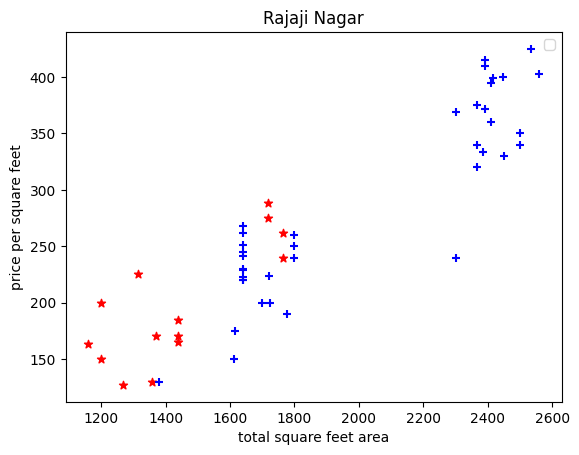

In [47]:
def plot_scatterchart(df,location):
    bhk2= df[(df.location==location)&(df.bhk==2)]
    bhk3=df[(df.location==location)&(df.bhk==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price,marker='*',c='red')
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',c='blue')
    plt.xlabel('total square feet area')
    plt.ylabel("price per square feet")
    plt.legend()
    plt.title(location)
plot_scatterchart(df3,'Rajaji Nagar')
    

C:\Users\aswin\AppData\Local\Temp\ipykernel_19416\1664771797.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


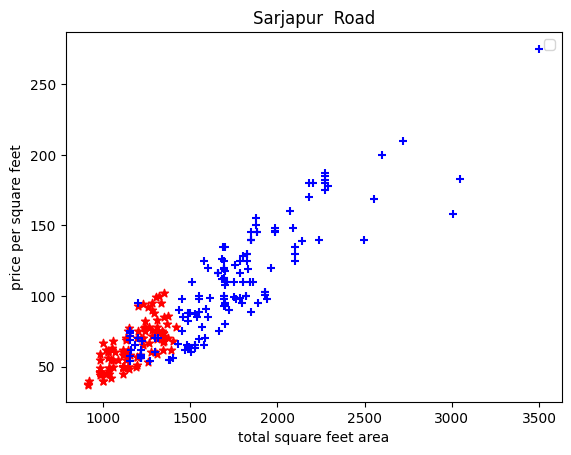

In [48]:
plot_scatterchart(df3,'Sarjapur  Road')
    

In [49]:
df3['location'].value_counts()

location
others                  2314
Whitefield               478
Sarjapur  Road           296
Electronic City          277
Kanakpura Road           190
                        ... 
Banjara Layout             4
Vishwapriya Layout         4
Thyagaraja Nagar           4
Vishveshwarya Layout       4
Marsur                     3
Name: count, Length: 242, dtype: int64

In [50]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df4 = remove_bhk_outliers(df3)

df4.shape

(7342, 7)

In [51]:
df3.shape

(10244, 7)

C:\Users\aswin\AppData\Local\Temp\ipykernel_19416\1664771797.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


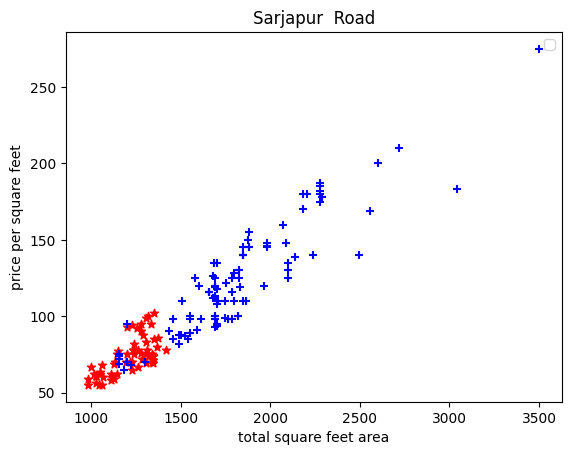

In [52]:
plot_scatterchart(df4,'Sarjapur  Road')

C:\Users\aswin\AppData\Local\Temp\ipykernel_19416\1664771797.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


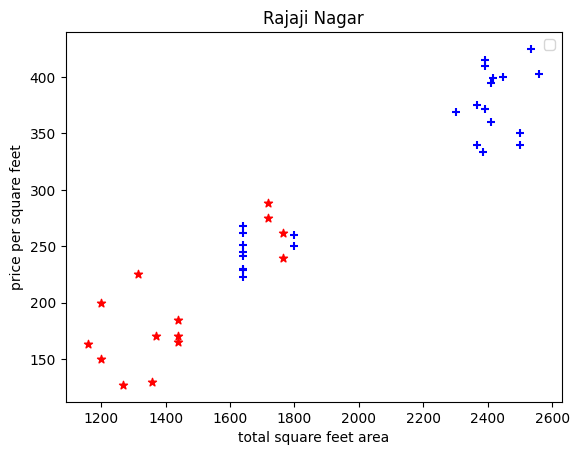

In [53]:
plot_scatterchart(df4,'Rajaji Nagar')

Text(0, 0.5, 'Count')

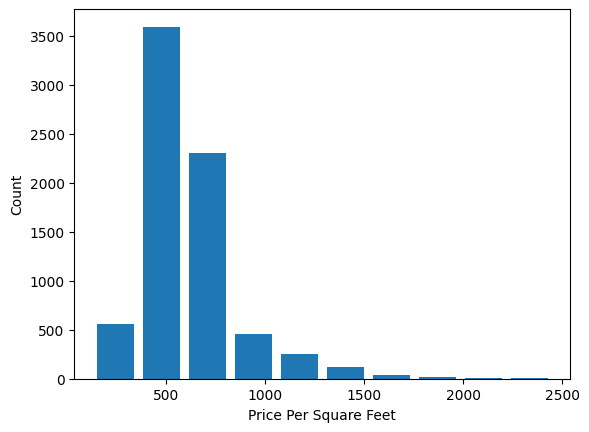

In [54]:
plt.hist(df4.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

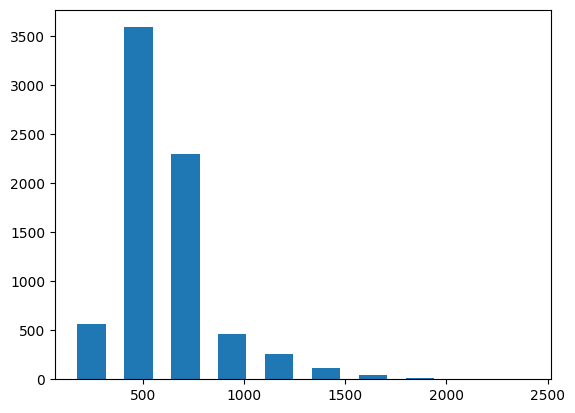

In [55]:
plt.hist(df4.price_per_sqft,rwidth=0.6)
plt.show()

In [56]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [57]:
df4[df4.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5271,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,400.000000
8481,others,10 BHK,12000.0,12.0,525.0,10,437.500000
8570,others,16 BHK,10000.0,16.0,550.0,16,550.000000
9309,others,11 BHK,6000.0,12.0,150.0,11,250.000000
9641,others,13 BHK,5425.0,13.0,275.0,13,506.912442


In [58]:
df4[df4.bath<df4.bhk+2]


,location,size,total_sqft,bath,price,bhk,price_per_sqft
1,Devarachikkanahalli,2 BHK,1250.0,2.0,40.0,2,320.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.0,2,691.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,40.0,2,341.880342
4,Devarachikkanahalli,3 BHK,1425.0,2.0,65.0,3,456.140351
5,Devarachikkanahalli,2 BHK,947.0,2.0,43.0,2,454.065470
...,...,...,...,...,...,...,...
10235,others,2 BHK,1200.0,2.0,70.0,2,583.333333
10236,others,1 BHK,1800.0,1.0,200.0,1,1111.111111
10239,others,2 BHK,1353.0,2.0,110.0,2,813.008130
10240,others,1 Bedroom,812.0,1.0,26.0,1,320.197044


In [59]:
df5=df4[df4.bath<df4.bhk+2]
df5.shape

(7264, 7)

In [60]:
df6=df5.drop(columns=['size','price_per_sqft'],axis=1)
df6.head()

,location,total_sqft,bath,price,bhk
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,65.0,3
5,Devarachikkanahalli,947.0,2.0,43.0,2


In [61]:
df6.shape

(7264, 5)

In [62]:
dummies=pd.get_dummies(df6.location)
dummies.head()

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [63]:
df7=pd.concat([df6,dummies],axis=1)
df7.head()

,location,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
1,Devarachikkanahalli,1250.0,2.0,40.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Devarachikkanahalli,1200.0,2.0,83.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Devarachikkanahalli,1170.0,2.0,40.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Devarachikkanahalli,1425.0,2.0,65.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,Devarachikkanahalli,947.0,2.0,43.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [64]:
df7.shape

(7264, 247)

In [65]:
df7.drop('others',axis=1,inplace=True)
df7.sample(10)

,location,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
5046,Marathahalli,2500.0,5.0,175.00,4,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2393,Garudachar Palya,1060.0,2.0,48.66,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4521,Kogilu,1140.0,2.0,50.66,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5497,R.T. Nagar,1140.0,3.0,130.00,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1272,Bisuvanahalli,1075.0,2.0,45.00,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
116,7th Phase JP Nagar,1420.0,2.0,96.00,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1492,CV Raman Nagar,1400.0,2.0,78.00,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
219,8th Phase JP Nagar,500.0,1.0,31.00,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2953,Hegde Nagar,1965.0,4.0,125.00,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1296,Bisuvanahalli,1180.0,2.0,55.50,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [66]:
df7.drop('location',axis=1,inplace=True)
df7.sample(1)

,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
2302,995.0,2.0,46.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [67]:
X=df7.drop('price',axis=1)
y=df7.price


In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [69]:
len(x_train)

5811

In [70]:
len(x_test)

1453

In [71]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [72]:
model.score(x_test,y_test)

0.8636789991408663

In [73]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
shuffle=ShuffleSplit(n_splits=10,test_size=0.20,random_state=0)
cv=cross_val_score(LinearRegression(),X,y,cv=shuffle)

In [74]:
cv

array([0.82622151, 0.81408431, 0.87757267, 0.84822717, 0.86091226,
       0.86408669, 0.84046509, 0.87337804, 0.87527211, 0.80566077])

In [75]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
def find_best_path_ofgridsearchcv(x,y):
    algo = {
        'LinearRegression':{
            'model':LinearRegression(),
            'params':{
                'fit_intercept': [True, False]
    }
    },
    'Decisiontreeregressor':{
    'model':DecisionTreeRegressor(),
    'params':{'splitter':['best'],
              'criterion' :["squared_error"]}
    },
    'lasso':{
    'model':Lasso(),
    'params':{
     'max_iter':[1000],
        'alpha':[1.0],
        'selection': ['cyclic']}
    }
    }
    score=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.25,random_state=0)
    for algo_name,config in algo.items():
        g=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        g.fit(X,y)
        score.append({
        'model':algo_name,
        'best_score':g.best_score_,
        'best_params':g.best_params_
        })
    return pd.DataFrame(score,columns=['model','best_score','best_params'])
find_best_path_ofgridsearchcv(X,y)

,model,best_score,best_params
0,LinearRegression,0.841442,{'fit_intercept': False}
1,Decisiontreeregressor,0.649623,"{'criterion': 'squared_error', 'splitter': 'be..."
2,lasso,0.703248,"{'alpha': 1.0, 'max_iter': 1000, 'selection': ..."


In [76]:
model.predict(x_test)

array([ 68.93323053,  97.50222307, 195.60898937, ..., 121.69303127,
        46.77915108,  34.53362647], shape=(1453,))

In [77]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return model.predict([x])

In [78]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

D:\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([80.079289])

In [79]:
x_train.columns

Index(['total_sqft', 'bath', 'bhk', ' Devarachikkanahalli',
       '1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [80]:
X.columns

Index(['total_sqft', 'bath', 'bhk', ' Devarachikkanahalli',
       '1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [81]:
len(x_train)

5811

In [82]:
x_train


,total_sqft,bath,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
150,1850.0,3.0,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3115,1053.0,2.0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2337,940.0,2.0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8612,2990.0,4.0,4,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8569,596.0,1.0,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6579,1697.0,3.0,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8904,1030.0,2.0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1627,3500.0,5.0,4,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9900,1200.0,3.0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [83]:
predict_price('1st Phase JP Nagar',10000, 3, 2)[0]

D:\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(800.7264737261269)

In [84]:
predict_price('Indira Nagar',1000, 2, 2)

D:\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([189.20489307])

In [85]:
predict_price('Indira Nagar',1000, 3, 3)

D:\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([191.59660286])

In [86]:
import pickle

In [91]:
import pickle
with open('bangalore_home_price.pickel','wb')as f:
    pickle.dump(model,f)

In [92]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))
    

In [89]:
import json